In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data inspection

In [2]:
df = pd.read_csv('/kaggle/input/advertising-dataset/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

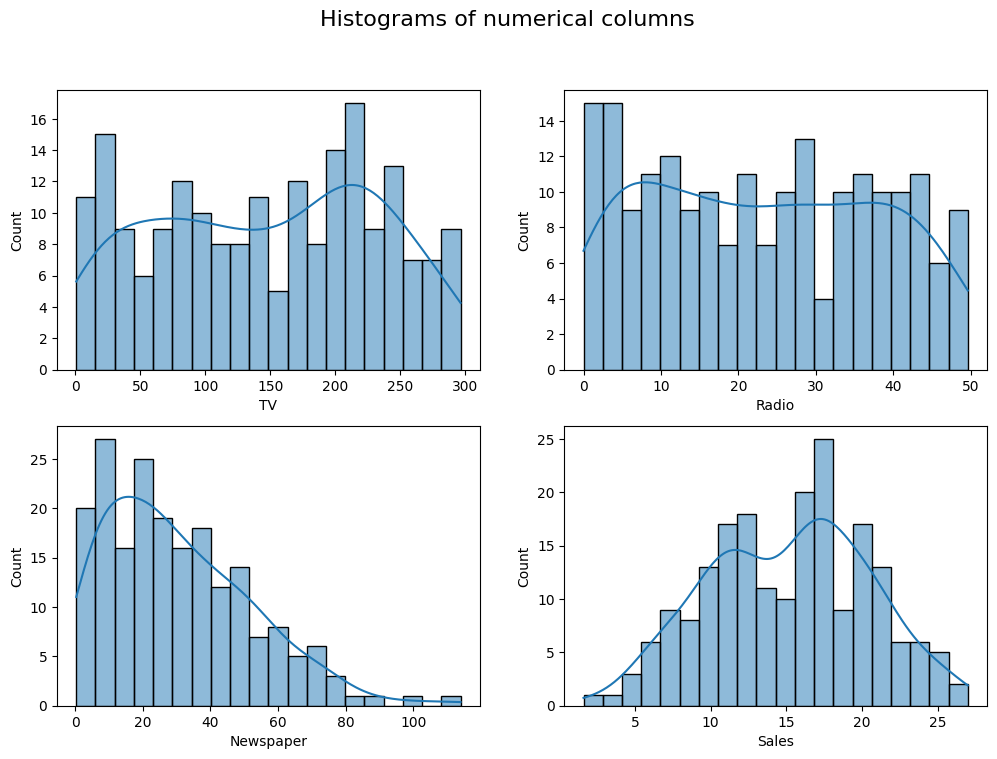

In [27]:
num_columns = list(df.select_dtypes(include=np.number).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,8))
for j in range(num):
    for i in range(num):
        try:
            sns.histplot(data=df,x=num_columns[0],kde=True,bins=20,ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of numerical columns', fontsize=16)
plt.show()

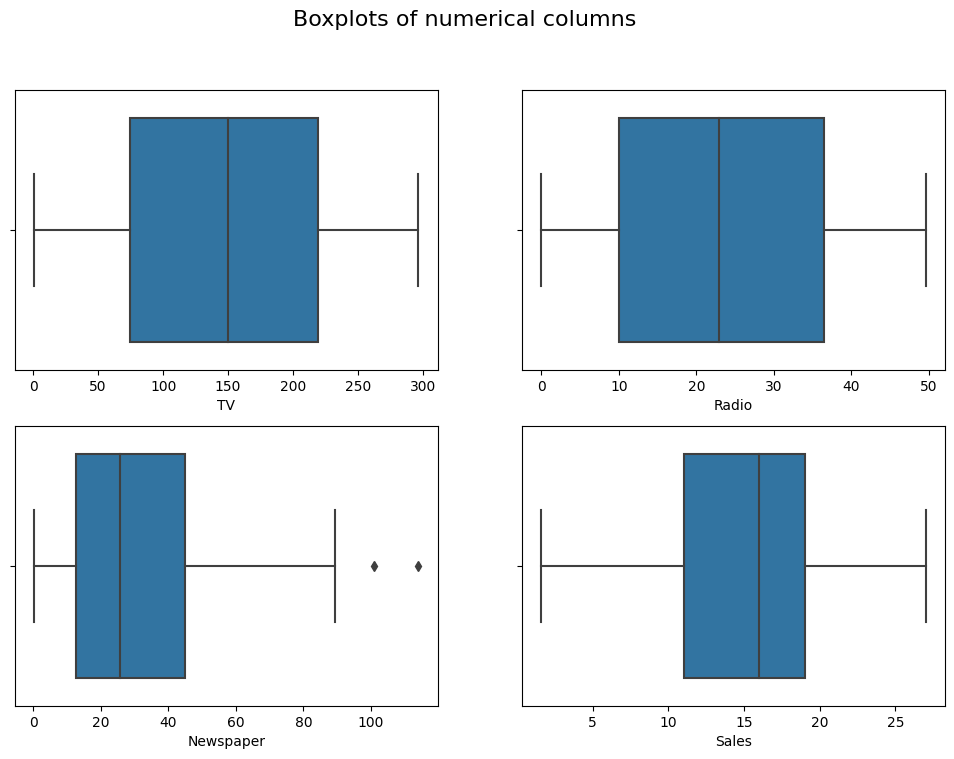

In [3]:
num_columns = list(df.select_dtypes(include=np.number).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,8))
for j in range(num):
    for i in range(num):
        try:
            sns.boxplot(data=df,x=num_columns[0],ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Boxplots of numerical columns', fontsize=16)
plt.show()

### Transforming the Data

**I will use this transformed data with Box-cox method to check that if it follows the assumptions better than original data**

In [4]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
pt = PowerTransformer()
pt.fit(df)
df_pt = pt.transform(df)
df_pt = pd.DataFrame(df_pt,columns=df.columns)
df_pt.head()

,TV,Radio,Newspaper,Sales
0,0.948674,0.962247,1.514335,1.319413
1,-1.191314,1.040179,0.787683,-0.896017
2,-1.647757,1.370710,1.516998,-0.591253
3,0.141020,1.142387,1.214656,0.262484
4,0.452715,-0.748651,1.211704,0.527225


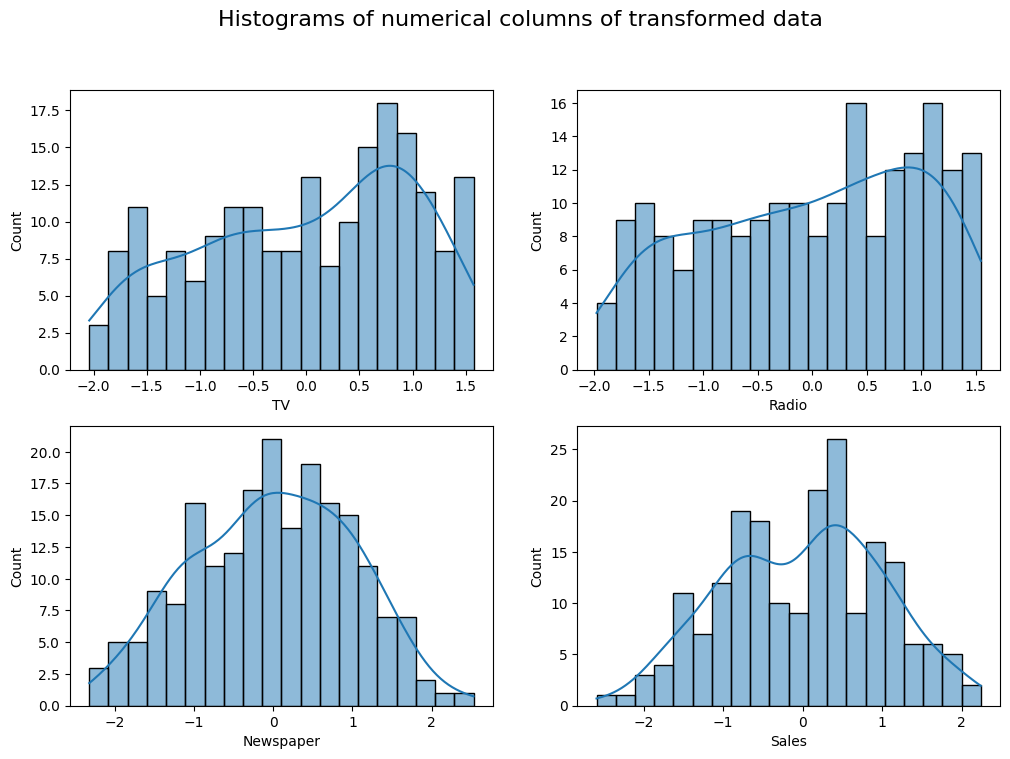

In [5]:
num_columns = list(df_pt.select_dtypes(include=np.number).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,8))
for j in range(num):
    for i in range(num):
        try:
            sns.histplot(data=df_pt,x=num_columns[0],kde=True,bins=20,ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of numerical columns of transformed data', fontsize=16)
plt.show()

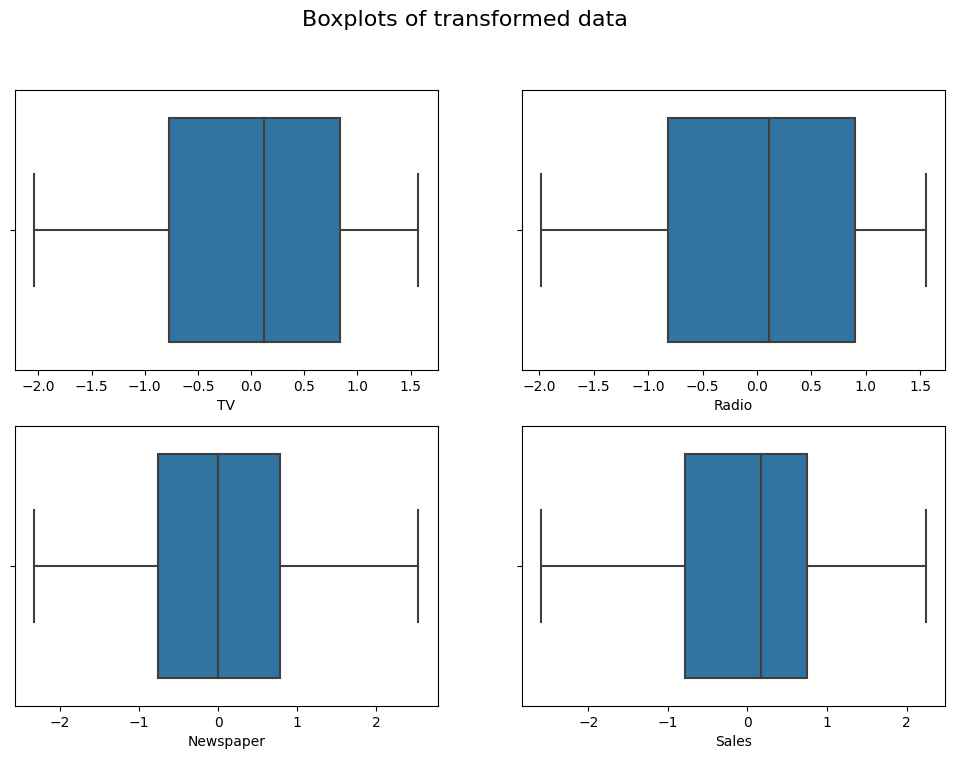

In [6]:
num_columns = list(df_pt.select_dtypes(include=np.number).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,8))
for j in range(num):
    for i in range(num):
        try:
            sns.boxplot(data=df_pt,x=num_columns[0],ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Boxplots of transformed data', fontsize=16)
plt.show()

# 2. Assumptions for Linear Regression

## 1.Linear relationship with Target variable

**According to first assumptin the relationship features and the target should be linearl. As the graph suggests that the TV is more linearly correlated with the Sales, so this will be the most important column in predicting Sales.**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


correlation of features with the sale
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Sales        1.000000
Name: Sales, dtype: float64


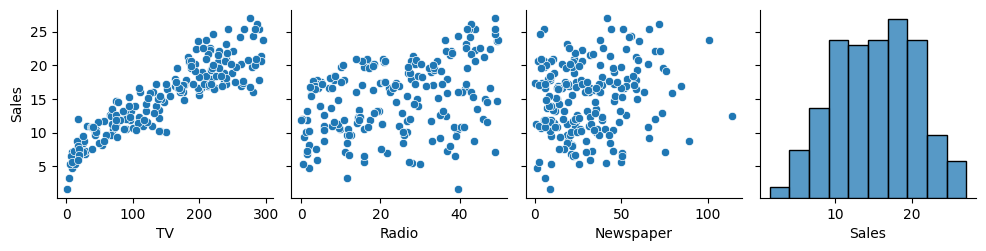

In [7]:
sns.pairplot(df,y_vars='Sales')
print('correlation of features with the sale')
print(df.corr()['Sales'])
plt.show()

## 2.Multicollinearity

**Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated, meaning they do not provide unique or independent information in the regression model. This can cause problems when fitting and interpreting the regression model.
When two or more predictor variables are highly correlated, it becomes difficult to change one variable without changing another. This makes it difficult for the regression model to estimate the relationship between each predictor variable and the response variable independently**

### Detection Method

**The most common way to detect multicollinearity is by using the variance inflation factor (VIF), which measures the correlation and strength of correlation between the predictor variables in a regression model. VIF values higher than 10 indicate that multicollinearity is a problem. VIF should be close to 1 and is good if less than 4 generally if greater than 4 it suggest weak multicollinearity**

**If you detect multicollinearity, you can resolve it by:**

* **Removing one or more of the highly correlated variables.**
* **Linearly combining the predictor variables in some way, such as adding or subtracting them from one way.**
* **Performing an analysis that is designed to account for highly correlated variables such as principal component analysis or partial least squares (PLS) regression**

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
vif = []
X = df.drop('Sales',axis=1)
for i in range(X.shape[1]):
    vif.append(variance_inflation_factor(X, i))
pd.DataFrame({'vif': vif}, index=df.columns[0:3])

,vif
TV,2.486772
Radio,3.285462
Newspaper,3.055245


### For transformed data

In [11]:
vif = []
X = df_pt.drop('Sales',axis=1)
for i in range(X.shape[1]):
    vif.append(variance_inflation_factor(X, i))
pd.DataFrame({'vif': vif}, index=df.columns[0:3])

,vif
TV,1.003112
Radio,1.094332
Newspaper,1.093766


**Transformed data perfomed way better than the original.**

### Another technique

**The correlation of independent columns should be very close to zero we only have radio and newspaper that are showing some relation to each other. We can drop Newspaper because it has a correlation of only 0.15 with Sales but keeping it will not cause much problem as the data is small we will compare the results by both ways in model building section**

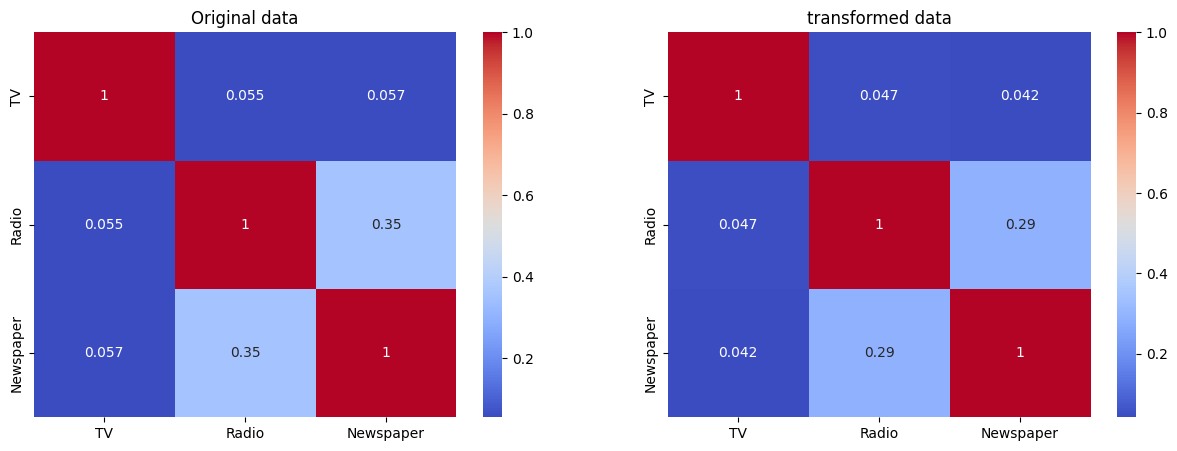

In [12]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.heatmap(df.drop('Sales',axis=1).corr(),annot=True,cmap='coolwarm',ax=ax[0])
sns.heatmap(df_pt.drop('Sales',axis=1).corr(),annot=True,cmap='coolwarm',ax=ax[1])
ax[0].set_title('Original data')
ax[1].set_title('transformed data')
plt.show()

## 3.Normality of Residuals

**In linear regression analysis, one of the key assumptions is the normality of residuals, which is also known as the assumption of normality. This assumption states that the residuals(the differences between the observed and predicted values) should follow a normal distribution**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X= df.drop('Sales',axis=1)
y= df['Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
residuals = y_test - y_pred

In [14]:
X= df_pt.drop('Sales',axis=1)
y= df_pt['Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_pt = lr.predict(X_test)
residuals_pt = y_test - y_pred_pt

### Graphical Method by KDE and QQ-plot

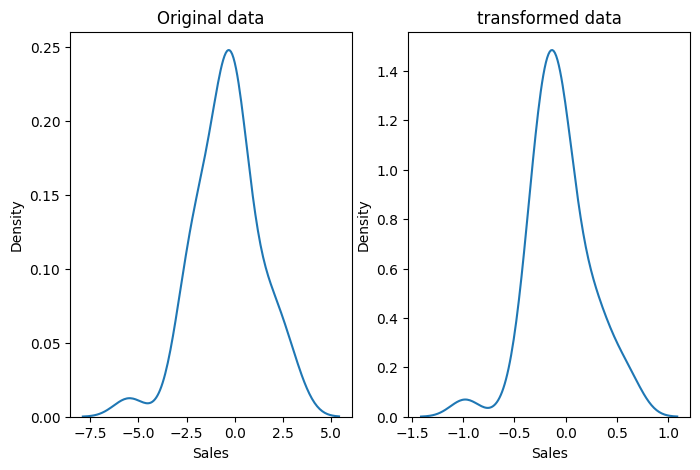

In [15]:
fig ,ax = plt.subplots(1,2,figsize=(8,5))
sns.kdeplot(residuals,ax=ax[0])
sns.kdeplot(residuals_pt,ax=ax[1])
ax[0].set_title('Original data')
ax[1].set_title('transformed data')
plt.show()

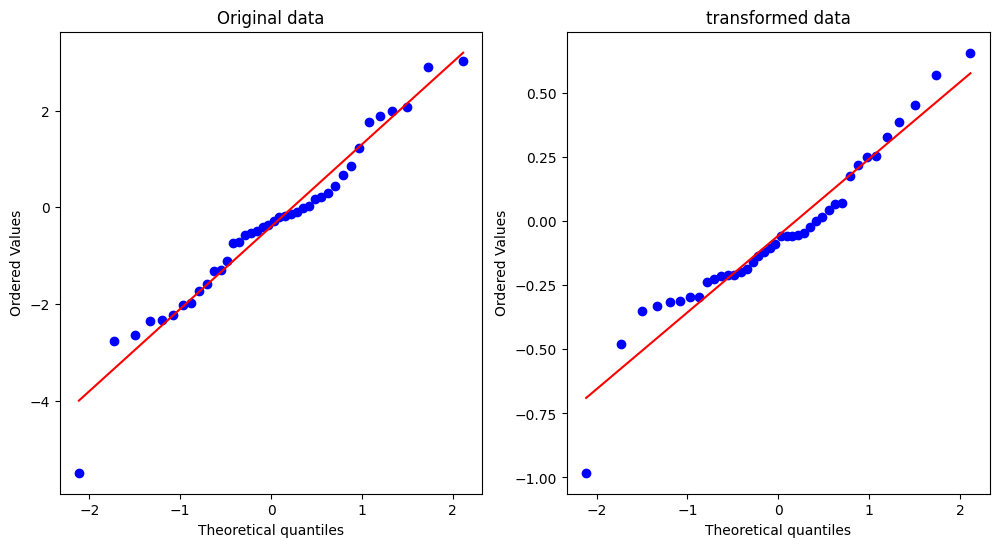

In [16]:
from scipy import stats
fig, ax = plt.subplots(1,2,figsize=(12,6))
stats.probplot(residuals, plot=ax[0], fit=True)
stats.probplot(residuals_pt, plot=ax[1] , fit=True)
ax[0].set_title('Original data')
ax[1].set_title('transformed data')
plt.show()

### Statistical method Shapiro-Wilk Test

In [17]:
from scipy.stats import shapiro
stat, p = shapiro(residuals)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')


stat=0.968, p=0.313
Probably Gaussian


In [18]:
from scipy.stats import shapiro
stat, p = shapiro(residuals_pt)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')


stat=0.948, p=0.066
Probably Gaussian


**All of these methods suggests that residuals of our original data are more normally distributed than the transformed but we can work with the transformed data it is also guassian**

## 4. Homoscedasticity 

**Homoscedasticity is one of the core assumptions of linear regression in which the variance of the residuals is assumed to be constant. In other words, the error terms should be of constant variance in the graph or errors vs. the predictor variable, and the values of the error terms should not change as the value of the predictor variable changes**

**The opposite of homoscedasticity is heteroscedasticity, where the error terms or the residuals are not constant as per the predictor variable, and the error terms change rapidly as the value of the predictor variable changes**

### In simple term

**There should not be any pattern around zero in the following scatter plot of predicted values vs residuals. If the points in the scatter plot exhibit a pattern, then heteroscedasticity is present and you can try follwing methods to solve**
* **Transform the response variable**
* **Redefine the response variable**
* **Use weighted regression**


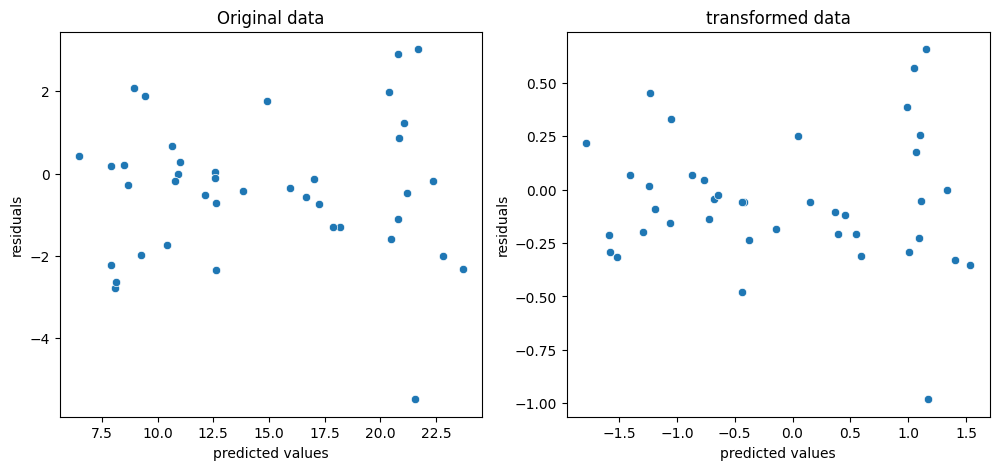

In [19]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x=y_pred,y=residuals, ax=ax[0])
sns.scatterplot(y=residuals_pt,x=y_pred_pt, ax=ax[1])
ax[0].set(xlabel='predicted values',ylabel='residuals')
ax[1].set(xlabel='predicted values',ylabel='residuals')
ax[0].set_title('Original data')
ax[1].set_title('transformed data')
plt.show()

**Graphically there seems no clear pattern but it is better to use a statistical test if you want to confirm**

### Statistical Method White's Test

**The null hypothesis is that there is no heteroscedasticity if p-value is less than 0.05 then the null hypothesis is rejected indicating heteroscedasticity**

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols('Sales ~ TV + Radio + Newspaper', data=df).fit()
# for transformed data
model_pt = smf.ols('Sales ~ TV + Radio + Newspaper', data=df_pt).fit()

In [21]:
from statsmodels.stats.diagnostic import het_white

# Perform White's test
white_test = het_white(model.resid, model.model.exog)
# Print the results of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 19.95314047160237, 'Test Statistic p-value': 0.01820380393168072, 'F-Statistic': 2.339574078742358, 'F-Test p-value': 0.015970878381135922}


### For transformed data

In [28]:
white_test = het_white(model_pt.resid, model_pt.model.exog)
# Print the results of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 16.94433099916628, 'Test Statistic p-value': 0.049594917390940324, 'F-Statistic': 1.9541249740002018, 'F-Test p-value': 0.046775501484789976}


**The rounded p-value upto 2 decimal places of White test for transformed data is 0.05 so we can keep the null hypothesis. So we will keep transformed data, maybe small p-value is because we have less data.**

## 5. Autocorrelation of Residuals

**We will use autocorrelation plot from the pandas plotting to check it.If the points in the plot fall randomly within the dashed lines and don't show a specific pattern, it suggests that there's no autocorrelation in the residuals. If the points fall in a specific pattern outside the dashed lines, it indicates autocorrelation.**

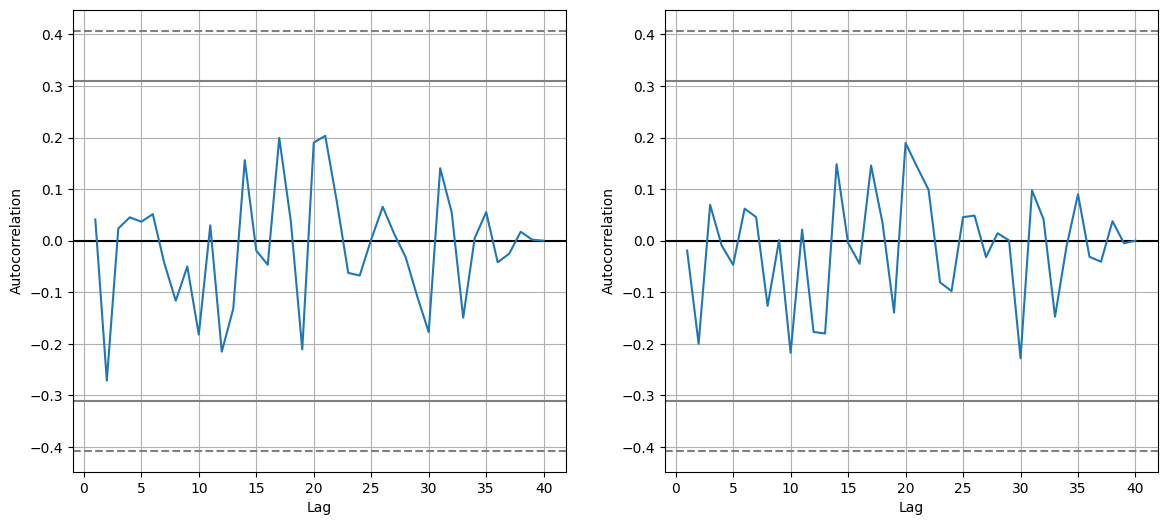

In [29]:
from pandas.plotting import autocorrelation_plot
# Create the autocorrelation plot
fig,ax=plt.subplots(1,2,figsize=(14,6))
autocorrelation_plot(residuals,ax=ax[0])
autocorrelation_plot(residuals_pt,ax=ax[1])
plt.show()

### Statistical method Durbin-Watson test

**To check the autocorrelation numerically we will use Durbin-Watson test**
* **The test statistic is approximately equal to 2*(1-r), where r is the sample ACF of the residuals. Therefore, for r == 0, indicating no autocorrelation, the test statistic equals 2. The statistic ranges from 0 to 4, and a value close to 2 suggests there is no autocorrelation. If the statistic is significantly less than 2, there is evidence of positive autocorrelation, and if it's greater than 2, it suggests negative autocorrelation**.

In [30]:
model = smf.ols('Sales ~ TV + Radio + Newspaper', data=df).fit()

# calculate Durbin-Watson statistic
dw = sm.stats.durbin_watson(model.resid)

print(f'Durbin-Watson statistic for transformed data : {dw:.2f}')

Durbin-Watson statistic for transformed data : 2.25


In [31]:
model = smf.ols('Sales ~ TV + Radio + Newspaper', data=df_pt).fit()

# calculate Durbin-Watson statistic
dw = sm.stats.durbin_watson(model.resid)
print(f'Durbin-Watson statistic for transformed data : {dw:.2f}')

Durbin-Watson statistic for transformed data : 2.19


**4/5 assumptions for linear regression supports our transformed data so we will build our final model on it.**

**And if you want to read more about assumptions check the guide on statology https://www.statology.org/multiple-linear-regression-assumptions/**

# 3. Model Building

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [33]:
# X= df.drop(['Sales','Newspaper'],axis=1)
X= df_pt.drop(['Sales'],axis=1)
y= df_pt['Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('R2:',r2_score(y_test,y_pred))
print(f'Adjusted R2 score : {1 - (1-lr.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}')

MSE: 0.09105416663313266
MAE: 0.23097127117693952
R2: 0.9181496821160748
Adjusted R2 score : 0.9113288222924144


**Now as I mentioned in assuption of multicollinearity that we will see results after dropping one of the features that are correlated. We will rop the feature that is most weakly correlated with the target i.e Newspaper**

### Dropping Newspaper to decrease multicollinearity

In [35]:
X= df_pt.drop(['Sales','Newspaper'],axis=1)
# X= df.drop(['Sales'],axis=1)
y= df_pt['Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print('MSE after dropping newspaper :',mean_squared_error(y_test,y_pred))
print('MAE after dropping newspaper :',mean_absolute_error(y_test,y_pred))
print('R2 after dropping newspaper :',r2_score(y_test,y_pred))
print(f'Adjusted R2 score after dropping newspaper : {1 - (1-lr.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}')

MSE after dropping newspaper : 0.08707489467225903
MAE after dropping newspaper : 0.2262202525306584
R2 after dropping newspaper : 0.9217267251772276
Adjusted R2 score after dropping newspaper : 0.9174957373489697


**And it improves the R-2 score. So if your data fulfill the assumptions then your model will be better. So try transforming your data always before performing Linear regression**

# 4. Regression visually

**Not only our model after dropping newspaper perform better but a dimension also reduces from 4D to 3D so we can now visually see whats happening**

In [9]:
coefs = lr.coef_
intercept = lr.intercept_
print(f"z = {coefs[0]:.3f}x + {coefs[1]:.3f}y + {intercept:.3f}")

z = 0.897x + 0.288y + 0.011


### Our regression equation is
### z = 0.897x + 0.288y + 0.011 

In [37]:
import plotly.express as px
import plotly.graph_objects as go

In [38]:
x_range = np.linspace(df_pt.iloc[:,0].min(), df_pt.iloc[:,0].max(), 10)
y_range = np.linspace(df_pt.iloc[:,1].min(), df_pt.iloc[:,1].max(), 10)
x_grid, y_grid = np.meshgrid(x_range, y_range)
z_grid = lr.predict(np.array([x_grid.ravel(), y_grid.ravel()]).T).reshape(x_grid.shape)
surface = go.Surface(x=x_grid, y=y_grid, z=z_grid, colorscale='Viridis', opacity=0.8)
scatter = go.Scatter3d(x=df_pt.iloc[:,0], y=df_pt.iloc[:,1], z=df_pt.iloc[:,-1], mode='markers', marker=dict(size=4, color='red'))
layout = go.Layout(scene=dict(xaxis_title='TV', yaxis_title='Radio', zaxis_title='Sales'))
fig = go.Figure(data=[surface, scatter], layout=layout)
fig.update_layout(
    autosize=False,
    width=1000,
    height=800
)
fig.show()

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Kindly Upvote if you like and if you not suggest me some improvements